In [3]:
import pandas as pd
df = pd.read_csv("data/Cleaned_Resume.csv")


In [4]:
df.head()  # View first 5 rows
df.info()  # Check data types and missing values
df.describe()  # Summary statistics
df.isnull().sum()  # Check missing values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2484 non-null   int64 
 1   Resume_str      2484 non-null   object
 2   Resume_html     2484 non-null   object
 3   Category        2484 non-null   object
 4   Cleaned_Resume  2483 non-null   object
dtypes: int64(1), object(4)
memory usage: 97.2+ KB


ID                0
Resume_str        0
Resume_html       0
Category          0
Cleaned_Resume    1
dtype: int64

In [6]:
df.dropna(subset=['Cleaned_Resume'], inplace=True)
df['Cleaned_Resume'] = df['Cleaned_Resume'].fillna('')



In [7]:
print(df.describe(include='all'))  # Summary of dataset
print(df['Category'].value_counts())  # Check class distribution


                  ID                                         Resume_str  \
count   2.483000e+03                                               2483   
unique           NaN                                               2481   
top              NaN           FINANCE OFFICER         Professional ...   
freq             NaN                                                  2   
mean    3.183389e+07                                                NaN   
std     2.145821e+07                                                NaN   
min     3.547447e+06                                                NaN   
25%     1.755043e+07                                                NaN   
50%     2.521301e+07                                                NaN   
75%     3.612182e+07                                                NaN   
max     9.980612e+07                                                NaN   

                                              Resume_html  \
count                                 

In [8]:
df = df.drop_duplicates(subset=['Cleaned_Resume'])
df.reset_index(drop=True, inplace=True)


In [9]:
print(df.isnull().sum())  # Ensure no missing data remains


ID                0
Resume_str        0
Resume_html       0
Category          0
Cleaned_Resume    0
dtype: int64


In [11]:
!pip install matplotlib seaborn


You should consider upgrading via the 'c:\users\kiren\resume_screener\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [16]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\kiren\resume_screener\venv\scripts\python.exe -m pip install --upgrade pip' command.


C:\Users\kiren\AppData\Local\Temp\ipykernel_16388\642832608.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette="magma")


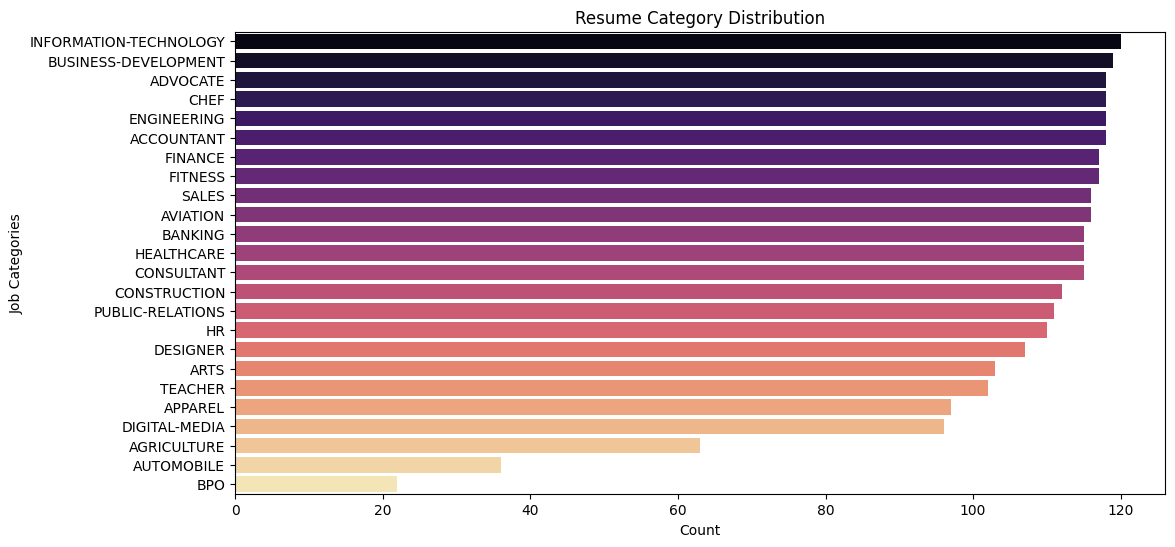

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette="magma")
plt.title("Resume Category Distribution")
plt.xlabel("Count")
plt.ylabel("Job Categories")
plt.show()


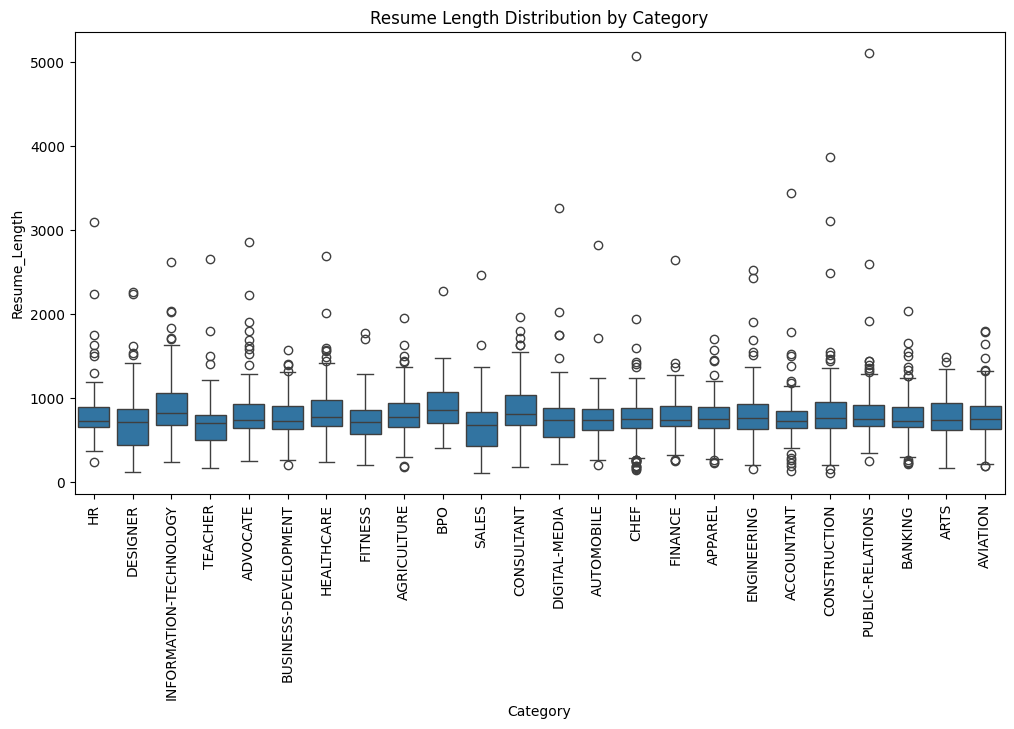

In [20]:
df["Resume_Length"] = df["Cleaned_Resume"].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.boxplot(x="Category", y="Resume_Length", data=df)
plt.xticks(rotation=90)
plt.title("Resume Length Distribution by Category")
plt.savefig("resume_length_distribution.png")  # Saves the plot
plt.show()


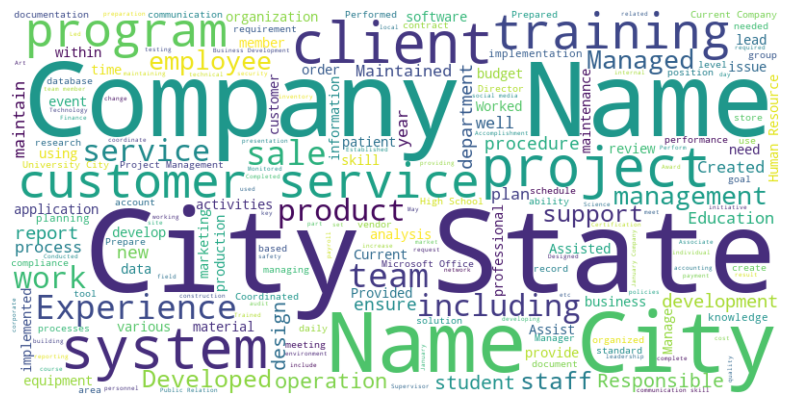

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned resumes into a single text
text = " ".join(df['Cleaned_Resume'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud.png")  # Saves the word cloud as an image
